In [2]:
from ovm import OVM, OVMParameters
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [3]:
use_pgf = False # "notebook"

def show(filename: str):
    if use_pgf:
        plt.savefig("figures/" + filename)
        plt.close()
    else:
        plt.show()

if use_pgf:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })
else:
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [13]:
model = OVM() # creating the model
model.set(OVMParameters(max_speed=3.0, max_distance=4.0, N=200, L=400, velocity_function="logistic", r=8))
model.integrate()

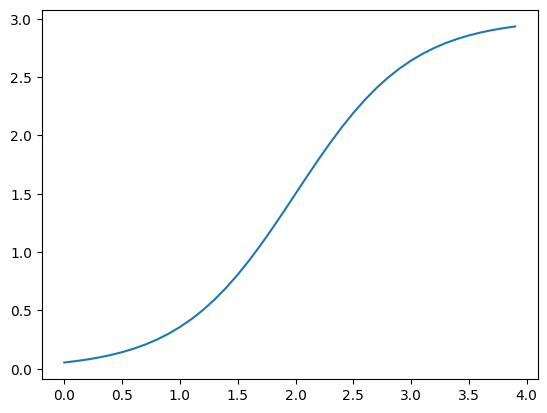

In [14]:
# plotting model V function
x = np.arange(0.0, 4.0, 0.1)
y = model.V(x)

fig = plt.figure()

plt.plot(x, y)

# fig.savefig('v_tanh.pgf')
show("v_tanh.pgf")

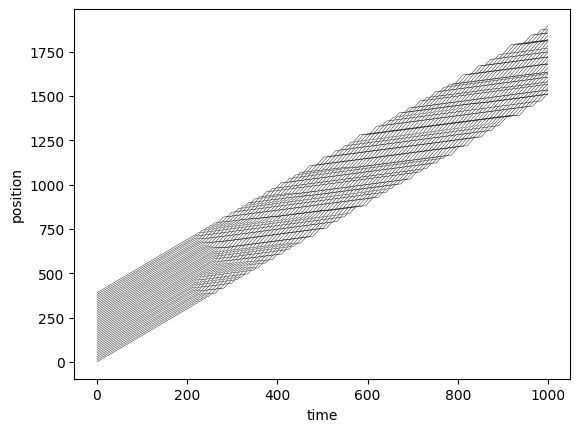

In [27]:
jump_car = 5 # The bigger, the less cars we see on the graph

x = model.x
time = model.time

start, end = None, None # start and end limits (to zoom)

for j in np.arange(0, model.N, jump_car):
    r = x[j,start:end]
    plt.plot(time[start:end], r, lw=0.3, c="k")
plt.xlabel("time")
plt.ylabel("position")
show("jam_evaluation_1.pgf")

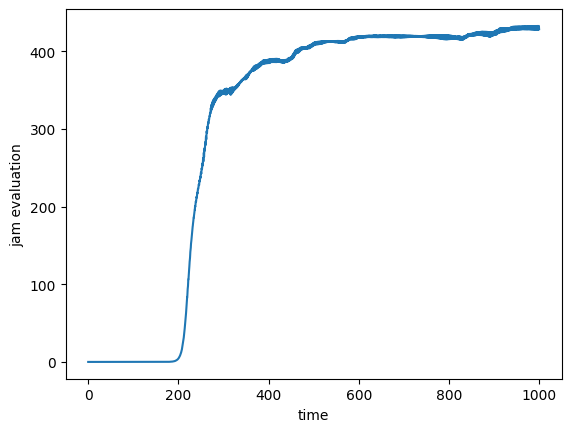

In [24]:
# evaluating the jam
plt.plot(model.time, model.evaluate_jam())
plt.xlabel("time")
plt.ylabel("jam evaluation")
show("jam_evaluation_2.pgf")

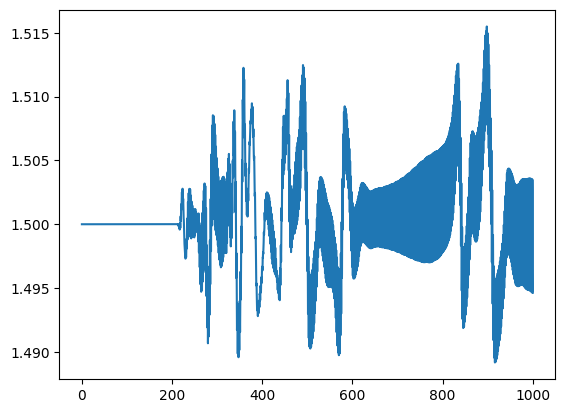

In [26]:
# average speed (just to be sure)
avg_speed = np.zeros(model.iterations)
for i in np.arange(0, model.iterations):
    avg_speed[i] = np.average(model.v[:,i])
plt.plot(model.time, avg_speed)
show("avg_speed")